<a href="https://colab.research.google.com/github/ssegifred/AI/blob/main/mltest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Dataset got got from uci archives https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [ ]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df['class'] = df['class'].replace({'g': 0, 'h': 1})

<ipython-input-4-2e84d11f8b9d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'g': 0, 'h': 1})


In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


In [ ]:
print(len(df[df["class"]==0]))

12332


In [ ]:
print(len(df))

19020


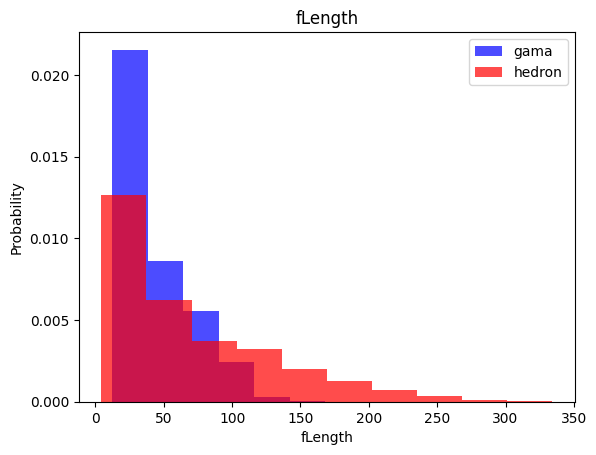

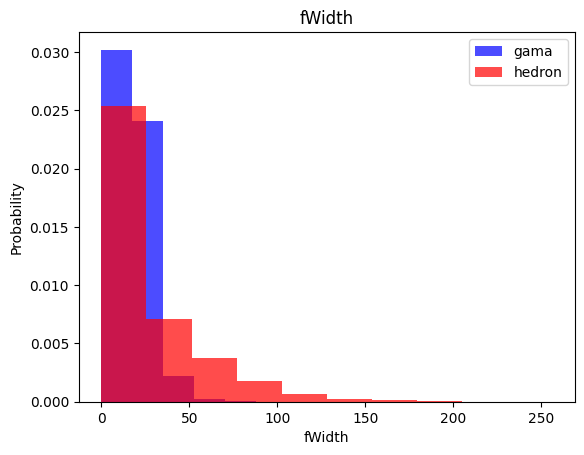

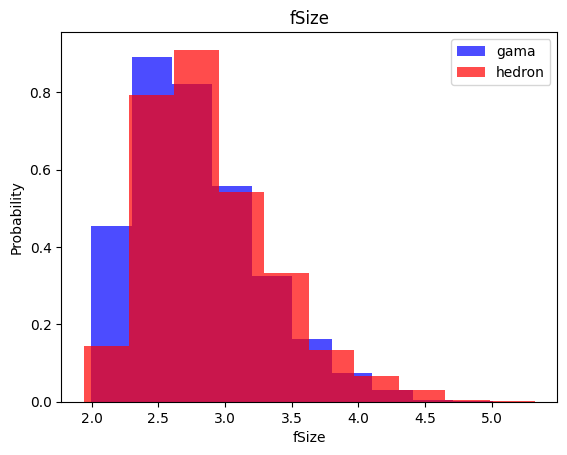

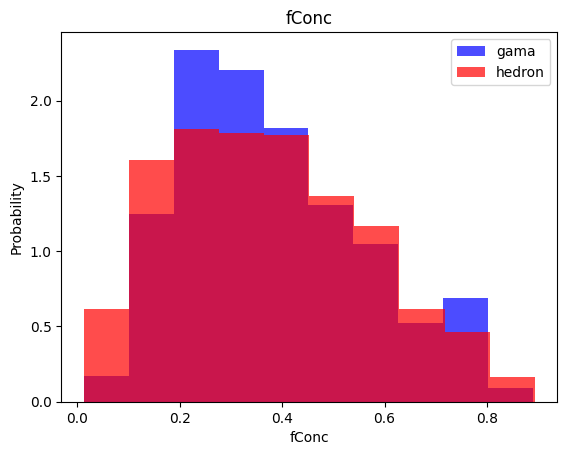

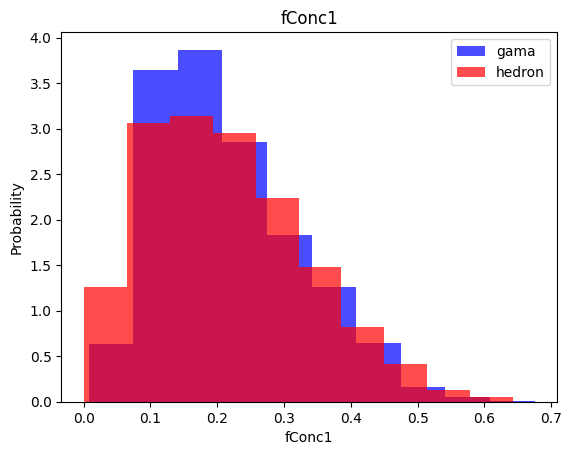

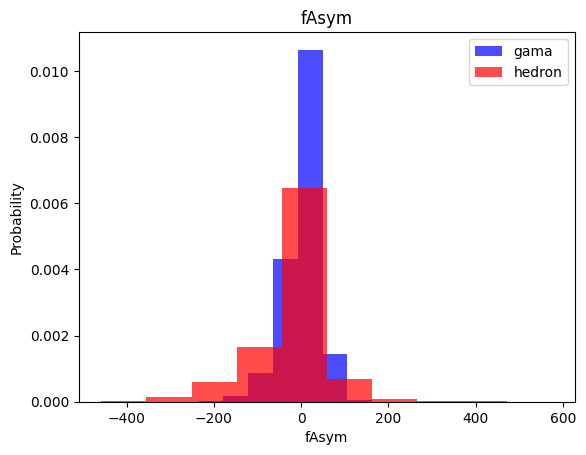

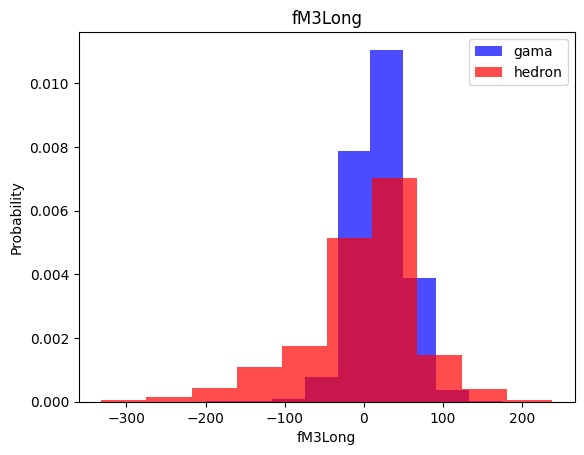

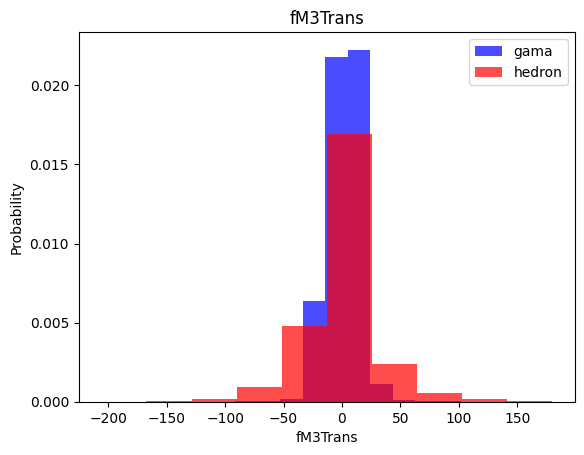

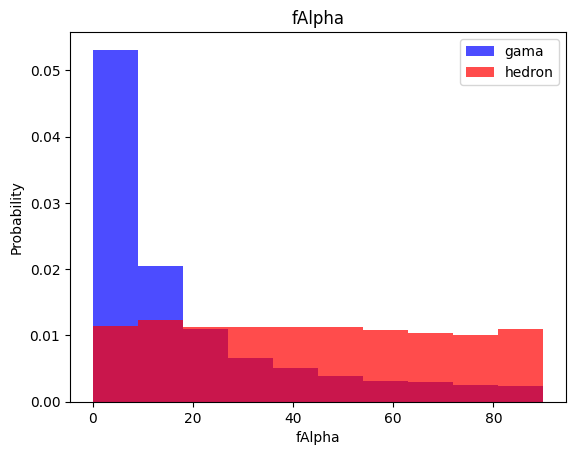

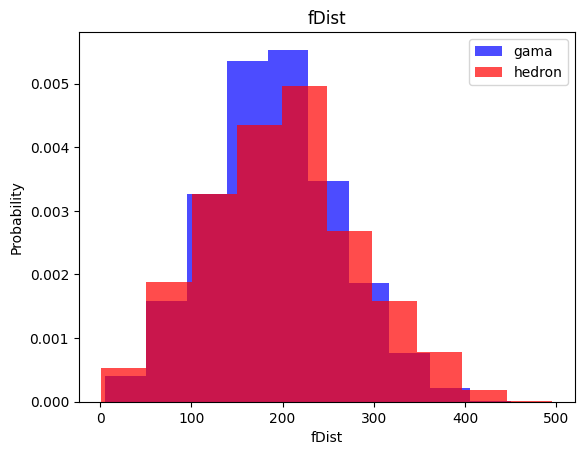

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==0][label],color='blue', label='gama', alpha=0.7,density=True)
  plt.hist(df[df["class"]==1][label],color='red', label='hedron', alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train,validation,test datasets


In [ ]:
train, valid, test=np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataFrame,oversample=False):
  x=dataFrame[dataFrame.columns[:-1]].values
  y=dataFrame[dataFrame.columns[-1]].values

  scaler= StandardScaler()
  x= scaler.fit_transform(x)

  if oversample:
    ros=RandomOverSampler()
    x,y =ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data,x,y

In [ ]:
train, x_train, y_train = scale_dataset(train,oversample=True)
valid, x_valid, y_valid = scale_dataset(valid,oversample=False)
test, x_test, y_test = scale_dataset(test,oversample=False)

K-nearest neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2477
           1       0.74      0.73      0.73      1327

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)


In [ ]:
y_pred=nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      2477
           1       0.68      0.42      0.52      1327

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model=LogisticRegression()
lr_model=lr_model.fit(x_train,y_train)

In [ ]:
y_pred=lr_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2477
           1       0.69      0.74      0.71      1327

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.79      0.79      3804



Support vector machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model=svm_model.fit(x_train,y_train)

In [ ]:
y_pred=svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2477
           1       0.81      0.80      0.80      1327

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

